# WeatherPy
----

Analysis

1. The cities with the highest maximum temperatures do not seem to fall exactly ON the equator as I would've expected, but rather are located just below and just above the equator. The cities located right at 0 latitude dip a little bit in temperture. 

2. The trend observed here with regard to humidity I also found to be unexpected. I would've guessed that cities along the equator had a higher percentage of humidity, but the scatter plot indicates that cities between 40 and 80 degrees latitude have a much higher percentage of humidity overall. 

3. The scatter plot with regard to Wind Speed indicates that the wind gets stronger as we move further from the equator. This trend does align with what I would've anticipated.


In [ ]:
pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
# Take subset of cities list to make sure code running properly
#cities_sub = cities[0:50]
#print(cities_sub)

# Base URL for Open Weather Map API, units in Farenheit
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + api_key + "&q="
#print(base_url)

# Create empty list to store relevant data from each city
city_data = []

# Print a statement showing API Calls have begun
print("Beginning Data Retrieval")
print("-----------------------------------------")

# Iterate through cities list, make API call for weather data, save data we want to city_data list
for city in cities:
    city_weather_data = requests.get(base_url + city).json()
    #print(json.dumps(city_weather_data, indent=4))
    try:
        print("Processing Record " + str(cities.index(city)+1) + " | " + str(city))
        city_lat = city_weather_data["coord"]["lat"]
        city_mtemp = city_weather_data["main"]["temp_max"]
        city_humidity = city_weather_data["main"]["humidity"]
        city_clouds = city_weather_data["clouds"]["all"]
        city_windspeed = city_weather_data["wind"]["speed"]
        city_data_dict = {"City": city, "Latitude": city_lat, "Max Temperature (F)": city_mtemp,
                          "Humidity (%)": city_humidity, "Cloudiness (%)": city_clouds,
                          "Wind Speed (mph)": city_windspeed}
        city_data.append(city_data_dict)
    except (KeyError):
        print("City Not Found. Skipping this City...")

print("------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------")
#print(city_data)

Beginning Data Retrieval
-----------------------------------------
Processing Record 1 | kapaa
Processing Record 2 | pangnirtung
Processing Record 3 | tuatapere
Processing Record 4 | san patricio
Processing Record 5 | ilulissat
Processing Record 6 | faya
Processing Record 7 | phangnga
Processing Record 8 | barrow
Processing Record 9 | pevek
Processing Record 10 | half moon bay
Processing Record 11 | yarim
Processing Record 12 | rikitea
Processing Record 13 | ostrovnoy
Processing Record 14 | antsohihy
Processing Record 15 | pontal do parana
Processing Record 16 | atuona
Processing Record 17 | grua
Processing Record 18 | rafaela
Processing Record 19 | road town
Processing Record 20 | mataura
Processing Record 21 | esperance
Processing Record 22 | chirongui
Processing Record 23 | sao desiderio
Processing Record 24 | saint-augustin
Processing Record 25 | portland
Processing Record 26 | praia da vitoria
Processing Record 27 | broome
Processing Record 28 | beringovskiy
Processing Record 29 |

Processing Record 225 | ixtapa
Processing Record 226 | nikolskoye
Processing Record 227 | aklavik
Processing Record 228 | kaitangata
Processing Record 229 | cradock
Processing Record 230 | poya
Processing Record 231 | te anau
Processing Record 232 | jijiga
Processing Record 233 | cockburn town
Processing Record 234 | el dorado
Processing Record 235 | yalvac
Processing Record 236 | zharkent
Processing Record 237 | parabel
Processing Record 238 | mocambique
City Not Found. Skipping this City...
Processing Record 239 | cabo san lucas
Processing Record 240 | tumannyy
City Not Found. Skipping this City...
Processing Record 241 | devils lake
Processing Record 242 | yeppoon
Processing Record 243 | padang
Processing Record 244 | port macquarie
Processing Record 245 | cairns
Processing Record 246 | georgetown
Processing Record 247 | los llanos de aridane
Processing Record 248 | krasnoselkup
City Not Found. Skipping this City...
Processing Record 249 | geraldton
Processing Record 250 | kodiak
Pr

Processing Record 440 | kamenskoye
City Not Found. Skipping this City...
Processing Record 441 | pembroke
Processing Record 442 | guangzhou
Processing Record 443 | portsmouth
Processing Record 444 | tazmalt
Processing Record 445 | batemans bay
Processing Record 446 | labutta
City Not Found. Skipping this City...
Processing Record 447 | kralendijk
Processing Record 448 | vao
Processing Record 449 | kaabong
Processing Record 450 | lolua
City Not Found. Skipping this City...
Processing Record 451 | juneau
Processing Record 452 | louisbourg
City Not Found. Skipping this City...
Processing Record 453 | borama
City Not Found. Skipping this City...
Processing Record 454 | deqing
Processing Record 455 | arman
Processing Record 456 | fairbanks
Processing Record 457 | muros
Processing Record 458 | chalette-sur-loing
Processing Record 459 | komsomolskiy
Processing Record 460 | talnakh
Processing Record 461 | huarmey
Processing Record 462 | broken hill
Processing Record 463 | mayo
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
# Convert our list of dictionaries, city_data, to a dataframe
city_weather_df = pd.DataFrame(city_data)
city_weather_df.head()

,City,Latitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,kapaa,22.08,75.20,83,40,17.22
1,pangnirtung,66.15,10.40,55,90,4.70
2,tuatapere,-46.13,51.01,78,50,1.99
3,san patricio,-26.98,79.68,38,0,8.21
4,ilulissat,69.22,5.00,54,5,20.80


In [34]:
# Save to CSV
city_weather_df.to_csv("Output/city_weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

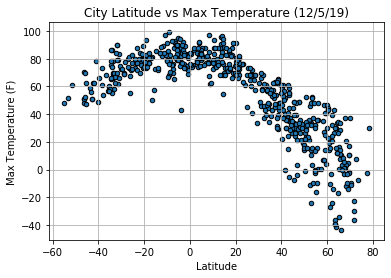

In [38]:
# Create scatter plot of City Latitude v Max Temp using dataframe
lat_mtemp_plot = city_weather_df.plot(x="Latitude", y="Max Temperature (F)", kind="scatter", facecolors="blue",
                                      edgecolors="black", title= "City Latitude vs Max Temperature (12/5/19)",
                                      grid=True)
plt.show()

# Save plot to png
plt.savefig("Output/lat_mtemp_plot.png")

#### Latitude vs. Humidity Plot

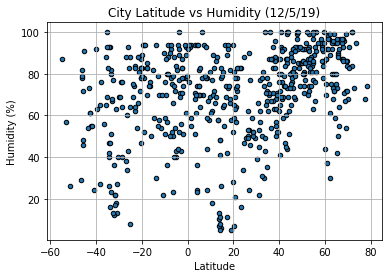

<Figure size 432x288 with 0 Axes>

In [40]:
# Create scatter plot of City Latitude v Humidity using dataframe
lat_humidity_plot = city_weather_df.plot(x="Latitude", y="Humidity (%)", kind="scatter", facecolors="blue",
                                      edgecolors="black", title= "City Latitude vs Humidity (12/5/19)",
                                      grid=True)
plt.show()

# Save plot to png
plt.savefig("Output/lat_humidity_plot.png")

#### Latitude vs. Cloudiness Plot

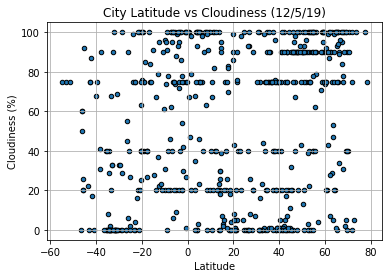

<Figure size 432x288 with 0 Axes>

In [42]:
# Create scatter plot of City Latitude v Cloudiness using dataframe
lat_clouds_plot = city_weather_df.plot(x="Latitude", y="Cloudiness (%)", kind="scatter", facecolors="blue",
                                      edgecolors="black", title= "City Latitude vs Cloudiness (12/5/19)",
                                      grid=True)
plt.show()

# Save plot to png
plt.savefig("Output/lat_clouds_plot.png")

#### Latitude vs. Wind Speed Plot

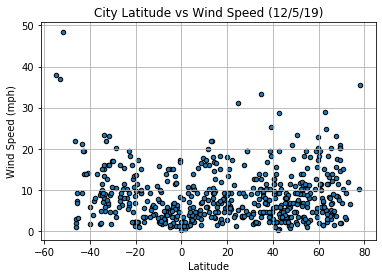

<Figure size 432x288 with 0 Axes>

In [44]:
# Create scatter plot of City Latitude v Wind Speed using dataframe
lat_wspeed_plot = city_weather_df.plot(x="Latitude", y="Wind Speed (mph)", kind="scatter", facecolors="blue",
                                      edgecolors="black", title= "City Latitude vs Wind Speed (12/5/19)",
                                      grid=True)
plt.show()

# Save plot to png
plt.savefig("Output/lat_wspeed_plot.png")